# The Sparks Foundation #GRIPJUN21

> ## Name: Saachi Gogate
> ## Task 3: Exploratory Data Analysis - Retail
>> ### Objective: find out the weak areas where you can work to make more profit. 
>> ### Data: https://bit.ly/3i4rbWl

### Importing required libraries.

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import cufflinks as cf
import seaborn as sns
%matplotlib inline

In [2]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

print(__version__) # requires version >= 1.9.0

4.14.3


In [3]:
init_notebook_mode(connected=True)
cf.go_offline()

### Fetching the data

In [4]:
store = pd.read_csv('SampleSuperstore.csv')

In [5]:
store.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


<AxesSubplot:xlabel='Category', ylabel='Sales'>

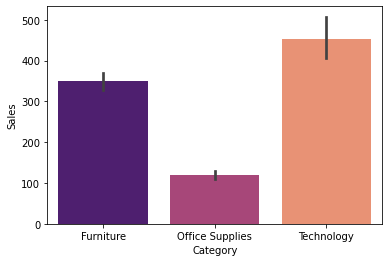

In [6]:
sns.barplot(data=store, x='Category', y='Sales', palette='magma')

<AxesSubplot:xlabel='Category', ylabel='Profit'>

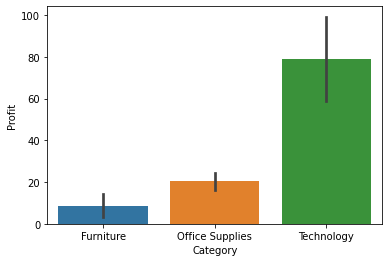

In [7]:
sns.barplot(data=store, x='Category', y='Profit')

### >Technology category has the maximum sales out of the three categories, and Office Supplies the minimum. Office Supply category sales can be improved.

### > Profit on Furniture is a weak area as it is the least among the three categories

In [8]:
store.iplot(x='Sub-Category', y='Quantity', kind='bar', sortbars=True)

### >The quantity of Binders sold is the most, and the least is of Copiers.

### Importing chart-studio to create choropleth maps.

In [ ]:
import chart_studio.plotly as py

In [ ]:
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [ ]:
init_notebook_mode(connected=True)

In [ ]:
by_s=store.groupby('State')

In [ ]:
ss = by_s.sum()
ss.drop(['Postal Code', "Discount"], axis=1) #there are only 49 states in the data.

### Getting State Codes for Geographical plots.

In [ ]:
codes = pd.read_csv('csvData.csv') # remove alaska and hawaii from this since they aren't included in the given dataset.
codes

In [ ]:
codes1=codes.drop([1,11],axis=0)
codes1

### Creating Geographical plots of USA showing Sales and Profit per State.

In [ ]:
data = dict(type = 'choropleth', locations=codes1['Code'],locationmode = 'USA-states', z=ss['Sales'], colorscale='darkmint',
            colorbar = {'title':'Sales'}, text=codes1['State'])

In [ ]:
map1 = go.Figure(data=[data], layout=dict(title='Sales Per State', geo={'scope':'usa'}))

In [ ]:
iplot(map1)

### > Here, darker the colour, more the sales. So, as we can see, California has the highest sales,followed by New York and Texas, and North Dakota has the weakest sales.

In [ ]:
data1 = dict(type = 'choropleth', locations=codes1['Code'],locationmode = 'USA-states', z=ss['Profit'], colorscale='pinkyl',
            colorbar = {'title':'Profit'}, text=codes1['State'])

In [ ]:
map2 = go.Figure(data=data1, layout= dict(title='Profit per State', geo={'scope':'usa'}))

In [ ]:
iplot(map2)

### > So, according to the colour scale, California has the highest profit, followed by New York, and Texas is actually in loss, even if it has third highest sales.

In [ ]:
by_sub = store.groupby('Sub-Category')
sub = by_sub.sum().drop(['Postal Code','Discount'], axis=1)
sub = sub.reset_index()
sub

In [ ]:
sub['Profit'].max()
sub[sub['Profit']> 55617]

In [ ]:
sub['Profit'].min()
sub[sub['Profit']<-17725 ]

In [ ]:
sub.iplot(x='Sub-Category', y='Profit', kind='bar', colors='purple', xTitle='Sub-categories', yTitle='Profit')

### > Copiers bring in the most Profit, and profit on Tables , Bookcases, Supplies has to be enhanced.